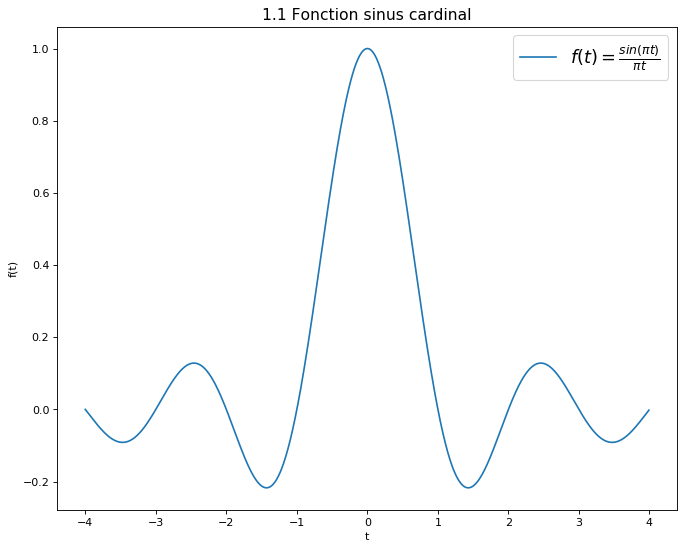

In [40]:
%matplotlib inline

import warnings
import scipy.fftpack
import IPython
import numpy as np
from sympy import *
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt

x_data = np.arange(-4.0, 4.0, 0.008)

def f(t):
    return np.sin(np.pi * t) / (np.pi * t)

figure_name = "1.1 Fonction sinus cardinal"

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x_data, f(x_data))
plt.title(figure_name, fontsize=14)
plt.xlabel("t")
plt.ylabel("f(t)")
plt.legend([r'$f(t) = \frac{sin( \pi t)}{\pi t}$'], prop={'size': 16});


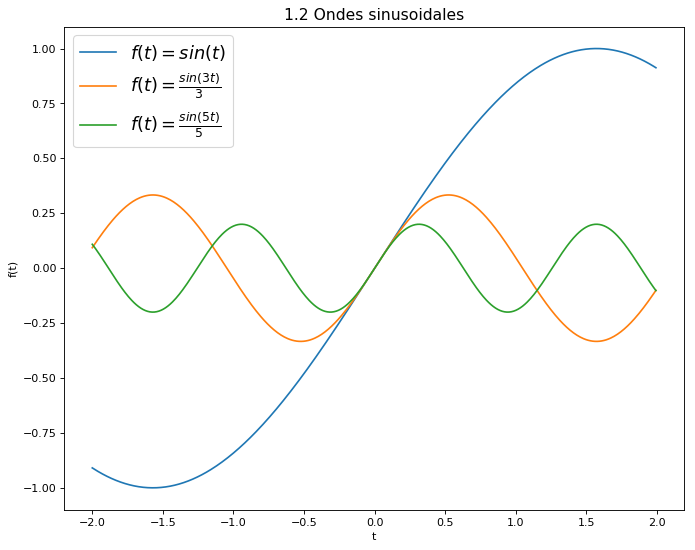

In [41]:

def f_sin_1(t):
    return np.sin(t)

def f_sin_2(t):
    return np.sin(3 * t) / 3

def f_sin_3(t):
    return np.sin(5 * t) / 5

x_data = np.arange(-2.0, 2.0, 0.008)
figure_name = "1.2 Ondes sinusoidales"
label_1 = r'$f(t) = {sin(t)}$'
label_2 = r'$f(t) = \frac{sin(3t)}{3}$'
label_3 = r'$f(t) = \frac{sin(5t)}{5}$'

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title(figure_name, fontsize=14)

plt.plot(x_data, f_sin_1(x_data))
plt.plot(x_data, f_sin_2(x_data))
plt.plot(x_data, f_sin_3(x_data))

plt.xlabel("t")
plt.ylabel("f(t)")

plt.legend([label_1, label_2, label_3], prop={'size': 16});


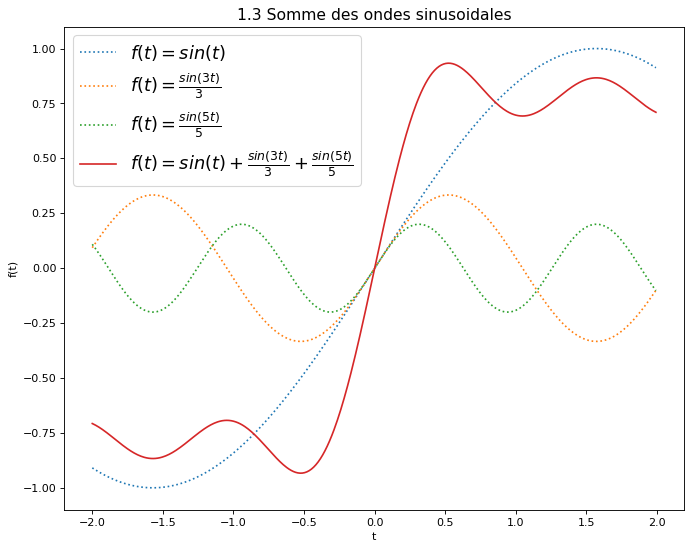

In [42]:
def f_sin_sum(t):
    return f_sin_1(t) + f_sin_2(t) + f_sin_3(t) 

figure_name = "1.3 Somme des ondes sinusoidales"
label_4 = r'$f(t) = {sin(t)} + \frac{sin(3t)}{3} + \frac{sin(5t)}{5}$'

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title(figure_name,fontsize=14)

plt.plot(x_data, f_sin_1(x_data), linestyle=':')
plt.plot(x_data, f_sin_2(x_data), linestyle=':')
plt.plot(x_data, f_sin_3(x_data), linestyle=':')
plt.plot(x_data, f_sin_sum(x_data))

plt.xlabel("t")
plt.ylabel("f(t)")

plt.legend([label_1, label_2, label_3, label_4], prop={'size': 16});

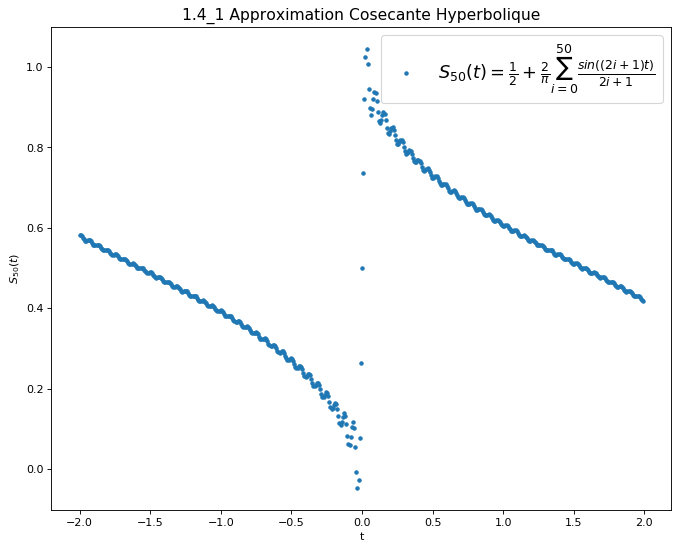

In [43]:
def f_sin_odd_sum(t):
    sum = 0
    for i in range(0,51):
        sum += np.sin((2. * i) * t) / (2. * i + 1)
    return sum

def f_4(t):   
    return (1.0 / 2.0) + (2 / np.pi) * f_sin_odd_sum(t);

figure_name = "1.4_1 Approximation Cosecante Hyperbolique"
label = r'$S_{50}(t) = \frac{1}{2} + \frac{2}{\pi} \sum_{i=0}^{50}\frac{sin((2i + 1)t)}{2i + 1}$'

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title(figure_name, fontsize=14)
plt.plot(x_data, f_4(x_data), 'o', markersize=3)

plt.xlabel("t")
plt.ylabel(r'$S_{50}(t)$')
plt.legend([label], prop={'size': 16});

La fonction ressemble à une cosécante hyperbolique, et elle semble plus définie avec 500 sinus.


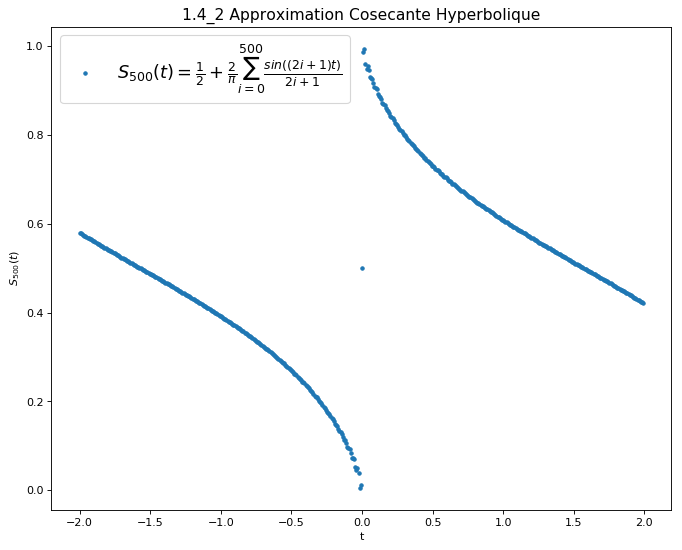

In [44]:
def f_sin_odd_sum(t):
    sum = 0
    for i in range(0,501):
        sum += np.sin((2. * i) * t) / (2. * i + 1)
    return sum


figure_name = "1.4_2 Approximation Cosecante Hyperbolique"
label = r'$S_{500}(t) = \frac{1}{2} + \frac{2}{\pi} \sum_{i=0}^{500}\frac{sin((2i + 1)t)}{2i + 1}$'

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title(figure_name, fontsize=14)
plt.plot(x_data, f_4(x_data), 'o', markersize=3)

plt.xlabel("t")
plt.ylabel(r'$S_{500}(t)$')
plt.legend([label], prop={'size': 16});

print("La fonction ressemble à une cosécante hyperbolique, et elle semble plus définie avec 500 sinus.")

Les fréquences théoriques présentes dans ce signal sont : 165pi / 2pi = 82.5 Hz, 6pi / 2pi = 3 Hz, 80pi / 2pi = 40 Hz

On remarque que plus la fréquence d'échantillonage est élevée, plus on peut voir les détails dans la forme du signal.
En effet, on commence à apercevoir les impacts du sinus et du cosinus qui ont une haute fréquence et une petite amplitude
Cependant, à un certain point, il devient inutile d'augmenter la fréquence d'échantillonage, car on peut déjà reconstruire le signal d'origine.

Les fréquences d'échantillonage qui respectent le théorème de Shannon sont 180 Hz et 330 Hz.
Ces fréquences sont plus grandes ou égales au double de la fréquence la plus élevée (82.5 Hz) dans le signal d'origine.
En pratique, on voudrait toujours avoir la plus grande fréquence d'échantillonage possible, mais il y a des contraintes physiques qui nous en empêchent.
On pense par exemple à la bande passante ou à l'espace de stockage, qui imposent un maximum à la fréquence d'échantillonage, car o

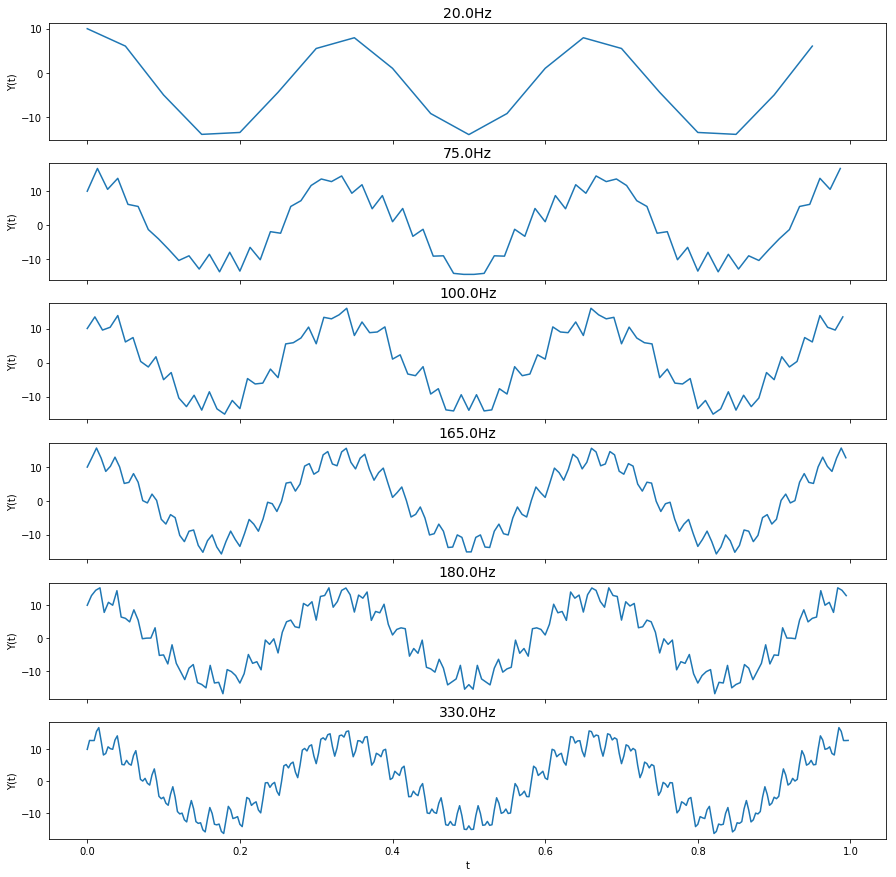

In [45]:
print("""Les fréquences théoriques présentes dans ce signal sont : 165pi / 2pi = 82.5 Hz, 6pi / 2pi = 3 Hz, 80pi / 2pi = 40 Hz

On remarque que plus la fréquence d'échantillonage est élevée, plus on peut voir les détails dans la forme du signal.
En effet, on commence à apercevoir les impacts du sinus et du cosinus qui ont une haute fréquence et une petite amplitude
Cependant, à un certain point, il devient inutile d'augmenter la fréquence d'échantillonage, car on peut déjà reconstruire le signal d'origine.

Les fréquences d'échantillonage qui respectent le théorème de Shannon sont 180 Hz et 330 Hz.
Ces fréquences sont plus grandes ou égales au double de la fréquence la plus élevée (82.5 Hz) dans le signal d'origine.
En pratique, on voudrait toujours avoir la plus grande fréquence d'échantillonage possible, mais il y a des contraintes physiques qui nous en empêchent.
On pense par exemple à la bande passante ou à l'espace de stockage, qui imposent un maximum à la fréquence d'échantillonage, car on ne dispose pas de ressources infinies.""")

def f_y(t):
    return (2. * np.sin(165. * np.pi * t)) + (13. * np.cos(6. * np.pi * t)) - (3. * np.cos(80. * np.pi * t))

frequences = [20., 75., 100., 165., 180., 330.]
fig, subplots = plt.subplots(len(frequences), sharex=True, figsize=(15,15))

for i in range(len(frequences)):
    x_data = np.arange(0., 1., 1./ frequences[i])
    subplots[i].set_title(str(frequences[i]) + "Hz", fontsize=14)
    subplots[i].plot(x_data, f_y(x_data))
    
for subplot in subplots.flat:
    subplot.set(ylabel='Y(t)')

plt.xlabel("t");



En regardant les graphiques suivant, on peut voir clairement que le premier signal a une période T = 0.1, car entre les points 0 et 0.1, on observe un cycle complet. Cette valeur concorde avec la valeur théorique T = 1 / f = 1 / 10 = 0.1
Ensuite, pour le second signal, il est plus difficile d'être exact en se basant sur le graphique. On voit seulement que sa période est légèrement inférieure à 0.05. Sa valeur théorique est effectivement de T = 0.04.
Le troisième signal, lui, semble faire exactement 5 cycles complets en 0.1 seconde et aurait donc une période de 0.1 / 5 = 0.02; Sa période théorique est bien T = 1 / 50 = 0.02.


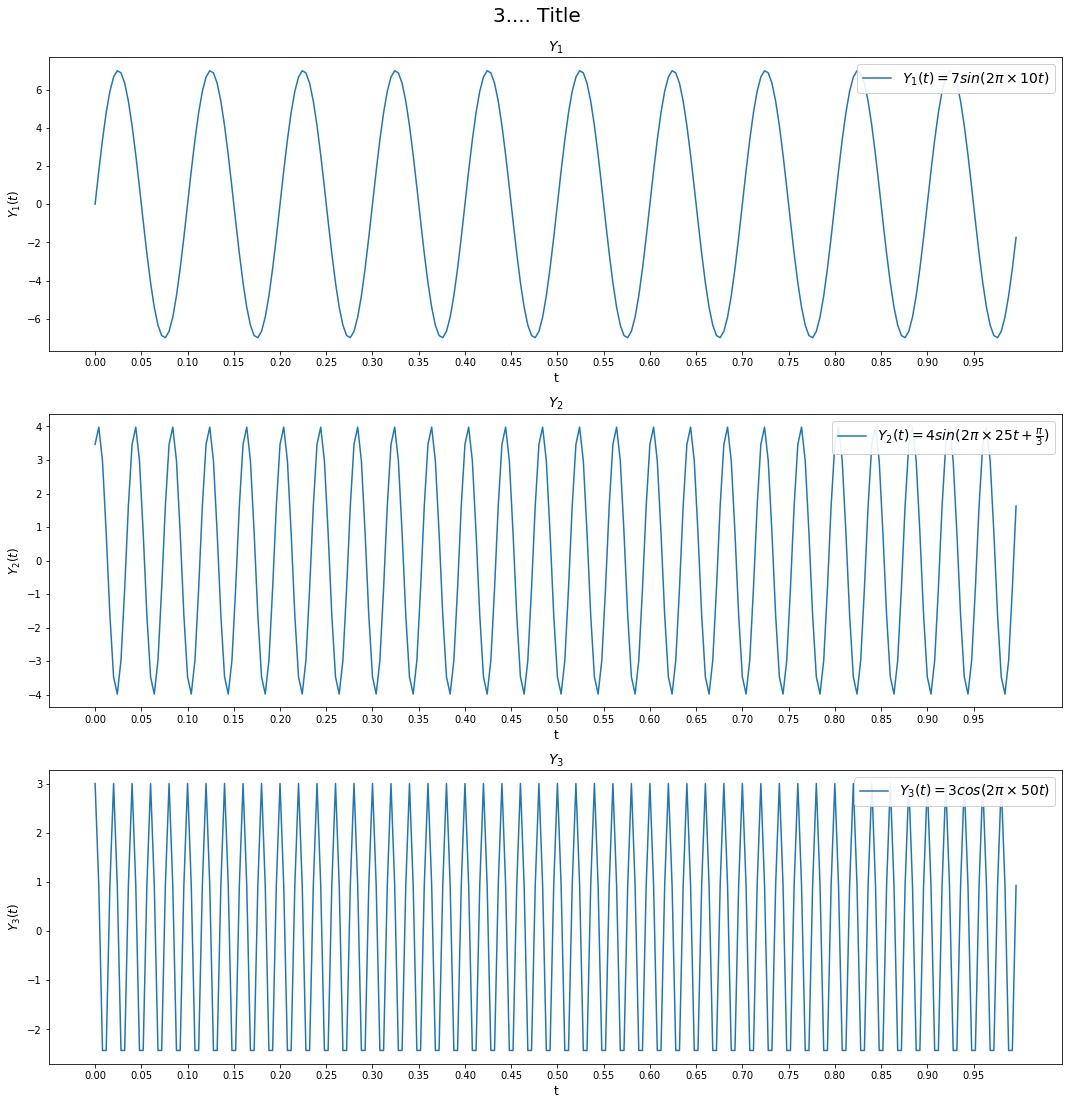

In [46]:
print("""En regardant les graphiques suivant, on peut voir clairement que le premier signal a une période T = 0.1, car entre les points 0 et 0.1, on observe un cycle complet. Cette valeur concorde avec la valeur théorique T = 1 / f = 1 / 10 = 0.1
Ensuite, pour le second signal, il est plus difficile d'être exact en se basant sur le graphique. On voit seulement que sa période est légèrement inférieure à 0.05. Sa valeur théorique est effectivement de T = 0.04.
Le troisième signal, lui, semble faire exactement 5 cycles complets en 0.1 seconde et aurait donc une période de 0.1 / 5 = 0.02; Sa période théorique est bien T = 1 / 50 = 0.02.""")

def f_y_1(t):
    return 7. * np.sin(2. * np.pi * 10. * t)

def f_y_2(t):
    return 4. * np.sin((2. * np.pi * 25. * t + (np.pi / 3)))

def f_y_3(t):
    return 3. * np.cos(2. * np.pi * 50. * t)

x_data = np.arange(0., 1., 1./250)
figure_name = "3.... Title"

fig, subplots = plt.subplots(3, figsize=(15,15))

subplots[0].plot(x_data, f_y_1(x_data))
subplots[0].set_title(r'$Y_1$', fontsize=14)
subplots[0].set_ylabel(r'$Y_1(t)$', fontsize=12)
subplots[0].set_xlabel('t', fontsize=12)
subplots[0].legend([r'$Y_1(t)=7sin(2\pi\times10t)$'], fontsize=14, loc=1, framealpha=0.9)

subplots[1].plot(x_data, f_y_2(x_data))
subplots[1].set_title(r'$Y_2$', fontsize=14)
subplots[1].set_ylabel(r'$Y_2(t)$', fontsize=12)
subplots[1].set_xlabel('t', fontsize=12)
subplots[1].legend([r'$Y_2(t)=4sin(2\pi\times25t + \frac{\pi}{3})$'], fontsize=14, loc=1, framealpha=0.9)

subplots[2].plot(x_data, f_y_3(x_data))
subplots[2].set_title(r'$Y_3$', fontsize=14)
subplots[2].set_ylabel(r'$Y_3(t)$', fontsize=12)
subplots[2].set_xlabel('t', fontsize=12)
subplots[2].legend([r'$Y_3(t)=3cos(2\pi\times50t)$'], fontsize=14, loc=1, framealpha=0.9)

for subplot in subplots:
    plt.sca(subplot)
    plt.xticks(np.arange(0., 1., 0.05))

fig.suptitle(figure_name, fontsize=20, y=1.02)
plt.tight_layout();

En regardant le graphique, la période semble d'être 0.2, ce qui implique une fréquence de 5 Hz. 
Le plus grand commun dénominateur des signaux qui forment un signal composite est la fréquence de ce signal composite.
Le PGCD des trois fréquences présentes dans le signal est 5, alors la théorie vient confirmer ce que nous observons.


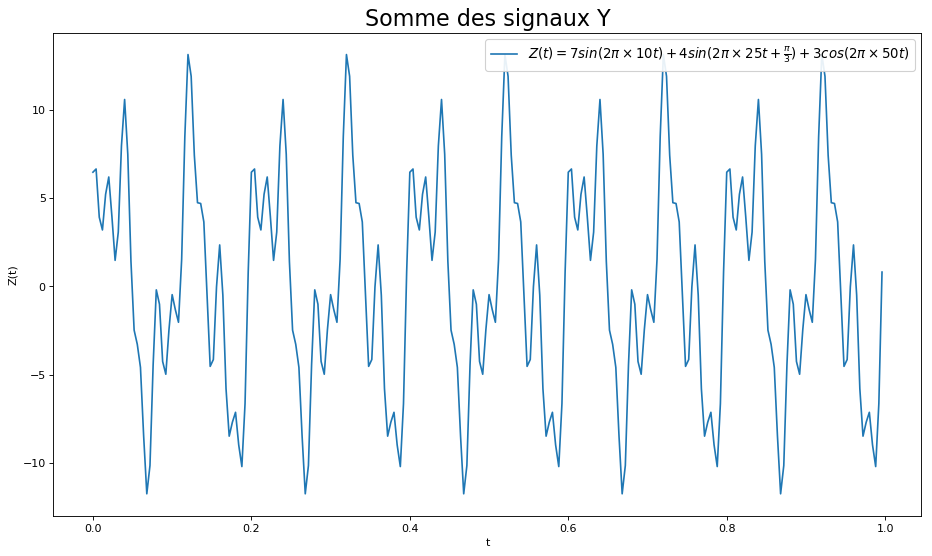

In [47]:
print("""En regardant le graphique, la période semble d'être 0.2, ce qui implique une fréquence de 5 Hz. 
Le plus grand commun dénominateur des signaux qui forment un signal composite est la fréquence de ce signal composite.
Le PGCD des trois fréquences présentes dans le signal est 5, alors la théorie vient confirmer ce que nous observons.""")

def f_y_sum(t):
    return f_y_1(t) + f_y_2(t) + f_y_3(t)

figure_name = "Somme des signaux Y"

plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x_data, f_y_sum(x_data))
plt.title(figure_name, fontsize=20)
plt.xlabel('t')
plt.ylabel('Z(t)')

plt.legend([r'$Z(t)=7sin(2\pi\times10t) + 4sin(2\pi\times25t + \frac{\pi}{3}) + 3cos(2\pi\times50t)$'], fontsize=12, loc=1, framealpha=0.9);


Les trois premiers graphiques sont les signaux individuels.
On remarque dans le premier graphique un pic à une fréquence à 10Hz. C'est à cela qu'on s'attend, puisqu'il s'agit de la fréquence du signal.
Il en va de même pour la seconde transformée. Son pic est à 25Hz, ce qui correspond aussi à la fréquence du signal original.
Le troisième signal ne fait pas exception. On retrouve un pic à 50 Hz, soit sa fréquence.

Ce qui est intéressant, c'est qu'en combinant ces trois signaux pour créer un signal composite, le signal devient très chaotique.
Toutefois, en appliquant une Transformée de Fourier Discrète à ce signal composite, on retrouve clairement les 3 fréquences des signaux qui le composent.
On remarque aussi que l'amplitude des différents signaux est conservée. Elle a un impact sur la hauteur des pics sur l'axe des ordonnées.



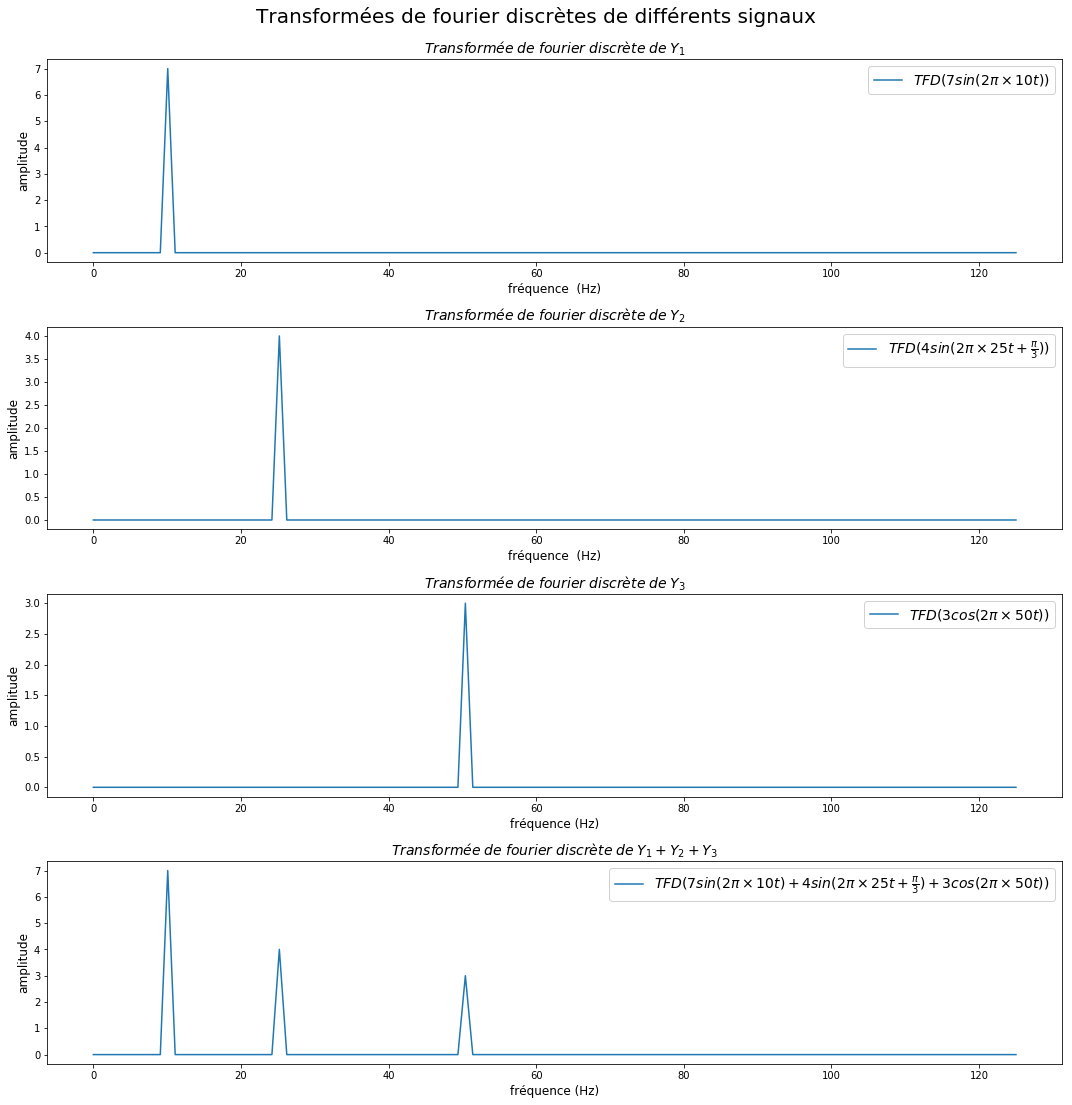

In [48]:

print("""Les trois premiers graphiques sont les signaux individuels.
On remarque dans le premier graphique un pic à une fréquence à 10Hz. C'est à cela qu'on s'attend, puisqu'il s'agit de la fréquence du signal.
Il en va de même pour la seconde transformée. Son pic est à 25Hz, ce qui correspond aussi à la fréquence du signal original.
Le troisième signal ne fait pas exception. On retrouve un pic à 50 Hz, soit sa fréquence.

Ce qui est intéressant, c'est qu'en combinant ces trois signaux pour créer un signal composite, le signal devient très chaotique.
Toutefois, en appliquant une Transformée de Fourier Discrète à ce signal composite, on retrouve clairement les 3 fréquences des signaux qui le composent.
On remarque aussi que l'amplitude des différents signaux est conservée. Elle a un impact sur la hauteur des pics sur l'axe des ordonnées.
""")

# inspiré de https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python
# Number of samplepoints
N = 250
# sample spacing
T = 1. / 250.
y1 = f_y_1(x_data)
y2 = f_y_2(x_data)
y3 = f_y_3(x_data)
ySum = f_y_sum(x_data)

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, subplots = plt.subplots(4, figsize=(15,15))

subplots[0].plot(xf, 2.0/N * np.abs(scipy.fftpack.fft(y1)[:N//2]))
subplots[0].set_title(r'$Transformée\; de\; fourier\; discrète\; de\; Y_1$', fontsize=14)
subplots[0].set_ylabel('amplitude', fontsize=12)
subplots[0].set_xlabel('fréquence  (Hz)', fontsize=12)
subplots[0].legend([r'$TFD(7sin(2\pi\times10t))$'], fontsize=14, loc=1, framealpha=0.9)

subplots[1].plot(xf, 2.0/N * np.abs(scipy.fftpack.fft(y2)[:N//2]))
subplots[1].set_title(r'$Transformée\; de\; fourier\; discrète\; de\; Y_2$', fontsize=14)
subplots[1].set_ylabel('amplitude', fontsize=12)
subplots[1].set_xlabel('fréquence  (Hz)', fontsize=12)
subplots[1].legend([r'$TFD(4sin(2\pi\times25t + \frac{\pi}{3}))$'], fontsize=14, loc=1, framealpha=0.9)


subplots[2].plot(xf, 2.0/N * np.abs(scipy.fftpack.fft(y3)[:N//2]))
subplots[2].set_title(r'$Transformée\; de\; fourier\; discrète\; de\; Y_3$', fontsize=14)
subplots[2].set_ylabel('amplitude', fontsize=12)
subplots[2].set_xlabel('fréquence (Hz)', fontsize=12)
subplots[2].legend([r'$TFD(3cos(2\pi\times50t))$'], fontsize=14, loc=1, framealpha=0.9)

subplots[3].plot(xf, 2.0/N * np.abs(scipy.fftpack.fft(ySum)[:N//2]))
subplots[3].set_title(r'$Transformée\; de\; fourier\; discrète\; de\; Y_1+Y_2+Y_3$', fontsize=14)
subplots[3].set_ylabel('amplitude', fontsize=12)
subplots[3].set_xlabel('fréquence (Hz)', fontsize=12)
subplots[3].legend([r'$TFD(7sin(2\pi\times10t) + 4sin(2\pi\times25t + \frac{\pi}{3}) + 3cos(2\pi\times50t))$'], fontsize=14, loc=1, framealpha=0.9)

figure_name = 'Transformées de fourier discrètes de différents signaux'
fig.suptitle(figure_name, fontsize=20, y=1.02)
plt.tight_layout();




In [49]:
print("""On entend une perturbation dominante de haute fréquence. 
On entend aussi un bruit constant plus grave, donc de basse fréquence.""")
IPython.display.Audio("audio.wav")


On entend une perturbation dominante de haute fréquence. 
On entend aussi un bruit constant plus grave, donc de basse fréquence.


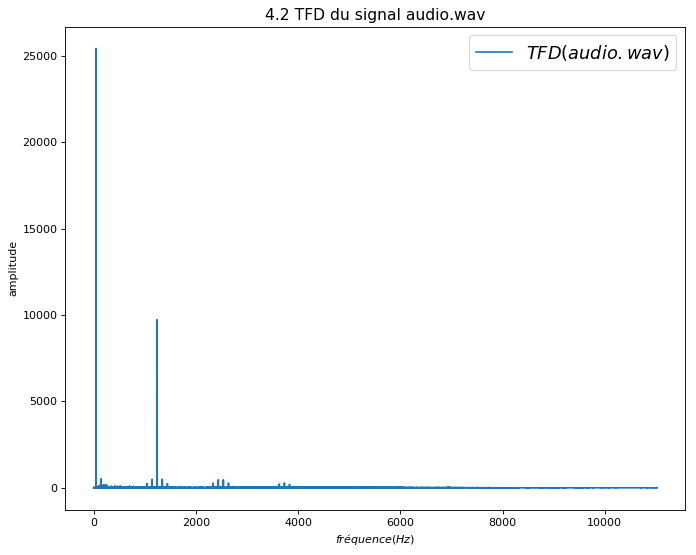

4.3
Le bruit de plus haute frequence qui correspond au deuxième grand pic dans le graphique de TFD du signal audio a une fréquence d'environ 1245Hz ce qui correspond à la note Ré#.



In [50]:

fs, data = wavfile.read("audio.wav")
fft_out =  scipy.fftpack.fft(data)

N = len(data)
T = 1. / fs

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

figure_name = "4.2 TFD du signal audio.wav"
# label = r'$TFD(audio.wav)$'

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title(figure_name, fontsize=14)
plt.legend(['a'], prop={'size': 16})
plt.xlabel(r'$fréquence(Hz)$')
plt.ylabel("amplitude")
plt.plot(xf, 2.0/N * np.abs(scipy.fftpack.fft(data)[:N//2]), label=r'$TFD(audio.wav)$');
plt.legend(prop={'size': 16});
plt.show();

print("""4.3
Le bruit de plus haute frequence qui correspond au deuxième grand pic dans le graphique de TFD du signal audio a une fréquence d'environ 1245Hz ce qui correspond à la note Ré#.
""")


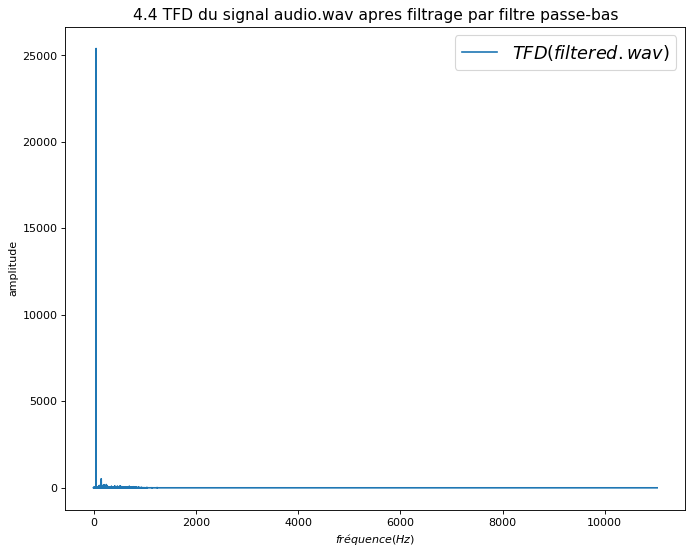

In [51]:
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)

fname = 'audio.wav'
outname = 'filtered.wav'


fs, data = wavfile.read(fname)

b = signal.firwin(129, cutoff=900, fs=fs)

data = signal.lfilter(b, [1.0], data)

wavfile.write('filtered.wav', fs, data.astype(np.int16))

fs, data = wavfile.read(outname)

N = len(data)
T = 1. / fs

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yf = 2.0/N * np.abs(scipy.fftpack.fft(data)[:N//2])

figure_name = "4.4 TFD du signal audio.wav apres filtrage par filtre passe-bas"
# label = r'$TFD(audio.wav)$'

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title(figure_name, fontsize=14)
plt.legend(['a'], prop={'size': 16})
plt.xlabel(r'$fréquence(Hz)$')
plt.ylabel("amplitude")
plt.plot(xf, yf, label=r'$TFD(filtered.wav)$');
plt.legend(prop={'size': 16});


IPython.display.Audio("filtered.wav")

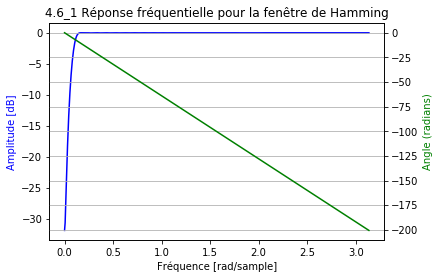

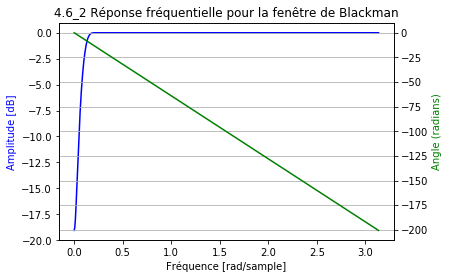

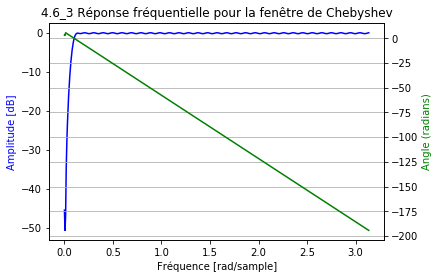


    On remarque dans les graphiques de réponse fréquentielle une grande différence au niveau le l'amplitude des signaux qui sont filtrés.
    En effet, on remarque que l'atténuation faite avec la fenêtre de Chebyshev semble être la plus forte pour la region ciblée, 
mais cela est au prix des vaguelletes qui vont influencer une partie de notre signal qu'on ne souhaite pas toucher.
    Hamming et Blackman sont similaires à part pour l'amplitude de leur atténuation, ce qui nous permet de dire que blackman devrait garder un
signal final plus fluide et fiable à celui d'origine, tendis que hamming sacrifiera un peu de cette fiabilité au prix d'une plus grande atténuation de la 
section fréquentielle visée.



In [52]:
# 4.5
fname = outname
outname_hamming = 'hamming.wav'
outname_blackman= 'blackman.wav'
outname_chebyshev = 'chebychev.wav'


fs, data = wavfile.read(fname)
b_hamming = signal.firwin(129, cutoff=250, fs=fs, window='hamming', pass_zero=False)
b_blackman = signal.firwin(129, cutoff=250, fs=fs, window='blackman', pass_zero=False)
b_chebyshev = signal.firwin(129, cutoff=250, fs=fs, window=('chebwin', 30), pass_zero=False)

data_hamming = signal.lfilter(b_hamming, [1.0], data)
data_blackman = signal.lfilter(b_blackman, [1.0], data)
data_chebyshev = signal.lfilter(b_chebyshev, [1.0], data)

wavfile.write(outname_hamming, fs, data_hamming.astype(np.int16))
wavfile.write(outname_blackman, fs, data_blackman.astype(np.int16))
wavfile.write(outname_chebyshev, fs, data_chebyshev.astype(np.int16))

# 4.6
w, h = signal.freqz(b_hamming)
fig = plt.figure()
plt.title('4.6_1 Réponse fréquentielle pour la fenêtre de Hamming')
ax1 = fig.add_subplot(111)

plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Fréquence [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

###

w, h = signal.freqz(b_blackman)
fig = plt.figure()
plt.title('4.6_2 Réponse fréquentielle pour la fenêtre de Blackman')
ax1 = fig.add_subplot(111)

plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Fréquence [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

###

w, h = signal.freqz(b_chebyshev)
fig = plt.figure()
plt.title('4.6_3 Réponse fréquentielle pour la fenêtre de Chebyshev')
ax1 = fig.add_subplot(111)

plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Fréquence [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

print("""
    On remarque dans les graphiques de réponse fréquentielle une grande différence au niveau le l'amplitude des signaux qui sont filtrés.
    En effet, on remarque que l'atténuation faite avec la fenêtre de Chebyshev semble être la plus forte pour la region ciblée, 
mais cela est au prix des vaguelletes qui vont influencer une partie de notre signal qu'on ne souhaite pas toucher.
    Hamming et Blackman sont similaires à part pour l'amplitude de leur atténuation, ce qui nous permet de dire que blackman devrait garder un
signal final plus fluide et fiable à celui d'origine, tendis que hamming sacrifiera un peu de cette fiabilité au prix d'une plus grande atténuation de la 
section fréquentielle visée.
""")

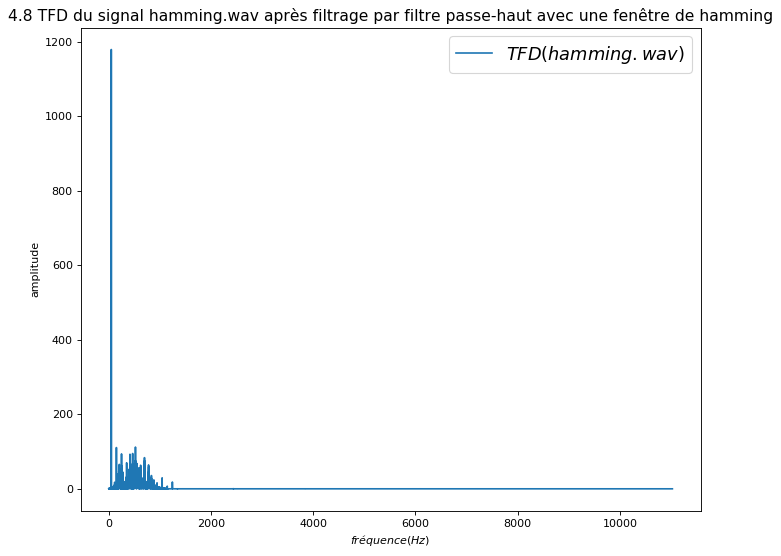

In [53]:
fname = outname_hamming

fs, data = wavfile.read(fname)

N = len(data)
T = 1. / fs

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yf = 2.0/N * np.abs(scipy.fftpack.fft(data)[:N//2])

figure_name = "4.8 TFD du signal hamming.wav après filtrage par filtre passe-haut avec une fenêtre de hamming"

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title(figure_name, fontsize=14)
plt.legend(['a'], prop={'size': 16})
plt.xlabel(r'$fréquence(Hz)$')
plt.ylabel("amplitude")
plt.plot(xf, yf, label=r'$TFD(hamming.wav)$');
plt.legend(prop={'size': 16});


IPython.display.Audio(fname)

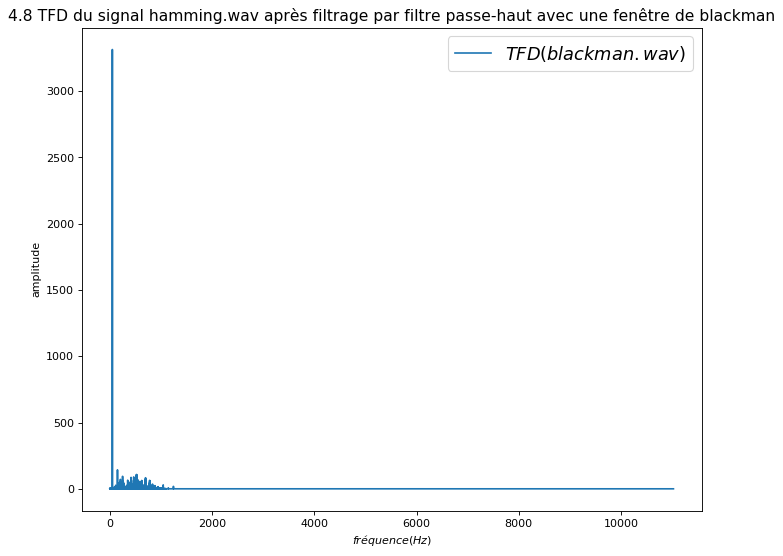

In [54]:
fname = outname_blackman

fs, data = wavfile.read(fname)

N = len(data)
T = 1. / fs

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yf = 2.0/N * np.abs(scipy.fftpack.fft(data)[:N//2])

figure_name = "4.8 TFD du signal hamming.wav après filtrage par filtre passe-haut avec une fenêtre de blackman"

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title(figure_name, fontsize=14)
plt.legend(['a'], prop={'size': 16})
plt.xlabel(r'$fréquence(Hz)$')
plt.ylabel("amplitude")
plt.plot(xf, yf, label=r'$TFD(blackman.wav)$');
plt.legend(prop={'size': 16});

IPython.display.Audio(fname)

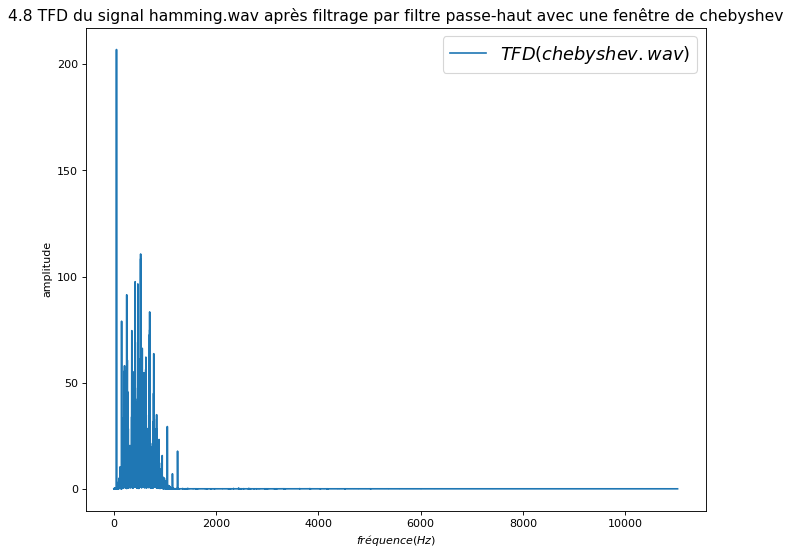

In [55]:
fname = outname_chebyshev

fs, data = wavfile.read(fname)

N = len(data)
T = 1. / fs

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yf = 2.0/N * np.abs(scipy.fftpack.fft(data)[:N//2])

figure_name = "4.8 TFD du signal hamming.wav après filtrage par filtre passe-haut avec une fenêtre de chebyshev"

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title(figure_name, fontsize=14)
plt.legend(['a'], prop={'size': 16})
plt.xlabel(r'$fréquence(Hz)$')
plt.ylabel("amplitude")
plt.plot(xf, yf, label=r'$TFD(chebyshev.wav)$');
plt.legend(prop={'size': 16});


IPython.display.Audio(fname)

In [56]:
print("""4.7
En écoutant les trois signaux, on semble remarquer des différences au niveau de la clareté musicale, mais elles sont tellement petites qu'il nous
est impossible de mettre la main sur les éléments qui sont différents à part si on y va de manière très subjective et qualitative. Ainsi, on croit que les
démarcations entre les différents signaux sonores sont plus accentuées pour blackman et hamming, tandis que la musique obtenue avec chebyshev semble être floue, ou plutôt provenir d'une pièce de l'autre côté d'un mur. Aussi, le bruit de basse fréquence semble être moins fort suite au filtrage avec une fenêtre de blackman comparé à un filtrage avec une fenêtre de hamming.
Le compromis pour le filtre passe haut est le niveau d'atténuation, car selon nos observations, plus la fréquence de coupure est basse, plus la fréquence parasite sera atténuée. Toutefois, notre signal au complet subit lui aussi une atténuation, bien que moins sévère que les fréquences au delà de notre fréquence de coupure.
Le compromis est donc de décider à quel point on est prêt à atténuer le signal pour se débarasser de la hautre fréquence parasite.
""")

print("""4.8
En regardant les spectrogrammes, on remarque effectivment que les suppositions faites à la question 4.6 semblent valides, la fenêtre de chebyshev offre la plus grande attenuation au prix d'une musicallité que devient moins "claire" à cause du fait qu'elle modifie légèrement les fréquences du signal musical.
En ce qui concerne les filtres de Hamming et Blackman, il semble que l'atténuation ait été insuffisante en rasion du pic qui se démarque encore nettement dans la région des basses fréquences. Néanmoins en écoutant les 3 signaux, les différences sont tellement minimes que nous ne pouvons les percevoir même si les spectrogrammes nous montrent qu'il y a effectivment des différences entre les 3 signaux.
""")

4.7
En écoutant les trois signaux, on semble remarquer des différences au niveau de la clareté musicale, mais elles sont tellement petites qu'il nous
est impossible de mettre la main sur les éléments qui sont différents à part si on y va de manière très subjective et qualitative. Ainsi, on croit que les
démarcations entre les différents signaux sonores sont plus accentuées pour blackman et hamming, tandis que la musique obtenue avec chebyshev semble être floue, ou plutôt provenir d'une pièce de l'autre côté d'un mur. Aussi, le bruit de basse fréquence semble être moins fort suite au filtrage avec une fenêtre de blackman comparé à un filtrage avec une fenêtre de hamming.
Le compromis pour le filtre passe haut est le niveau d'atténuation, car selon nos observations, plus la fréquence de coupure est basse, plus la fréquence parasite sera atténuée. Toutefois, notre signal au complet subit lui aussi une atténuation, bien que moins sévère que les fréquences au delà de notre fréquence de coup